# Final Checks for model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')

## 1. Use ONLY compliance available columns

In [3]:
df = df[df['compliance'].notna()]
df.shape

(159880, 5)

In [4]:
df['fine_amount'] = df['fine_amount'].fillna(0)
df.shape

(159880, 5)

In [28]:
df['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

## 2. Build the actual model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature_names_tickets = ['ticket_id', 'fine_amount']
X_tickets = df[feature_names_tickets]
y_tickets = df['compliance']

#Test size is chosen to get X_test value of 61,001 as the same is provided test data
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, test_size = 0.38153900, random_state = 0)
clf = LogisticRegression(C=100).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(98879, 2)
(61001, 2)


## 3. Apply GridSearchCV

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,
                           scoring = 'accuracy', cv = 5, verbose=0)
grid_search.fit(X_train, y_train)
print('Best coring:\n Best C: {}'.format(grid_search.best_score_))

Best coring:
 Best C: 0.9269713488926803


In [32]:
#Fit based on new model now
clf_best = LogisticRegression(C = 0.92).fit(X_train, y_train)

## 7. Check ROC / AUC

In [33]:
# First we need to load our test dataset
df1 = pd.read_csv(f"D:/Docs/test_1.csv", encoding='mac_roman')
df1['fine_amount'] = df1['fine_amount'].fillna(0)
df1.shape

(61001, 3)

In [34]:
feature_names_test = ['ticket_id', 'fine_amount']
X_test_new = df1[feature_names_test]
print(X_test.shape)
print(X_test_new.shape)

(61001, 2)
(61001, 2)


<ipython-input-11-9dbb75066776>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


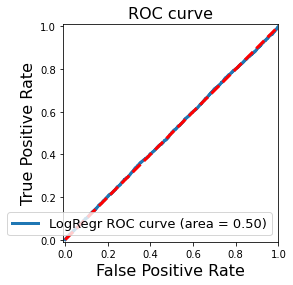

In [11]:
from sklearn.metrics import roc_curve, auc
y_score_lr = clf_best.decision_function(X_test_new)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [9]:
score = clf.score(X_test_new, y_test)
print(score)

0.9282634710906379


In [12]:
predictions = clf.predict(X_test_new)
predictions.shape

(61001,)

In [27]:
print(predictions.sum())

0.0


In [ ]:
pred_values = pd.DataFrame(predictions, columns='Pred') 
pred_values.to_csv('result_pred.csv')